<!DOCTYPE html>
<html>
<body>
<div align="center">
<h2>Prepared by Asif Bhat</h2>
<h1>Working with Dates in Pandas</h1>
</div>
    
</body>
</html>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
person = pd.DataFrame({'Name':['Asif' , 'Basit' , 'John', 'Hary'],
                       'DOB': ['3/20/1960', '3/19/1981', '9/12/1999' , '7/12/1967'],
                       'EmpID': ['E453', 'E983', 'E675','E120']})
person
person.dtypes

,Name,DOB,EmpID
0,Asif,3/20/1960,E453
1,Basit,3/19/1981,E983
2,John,9/12/1999,E675
3,Hary,7/12/1967,E120


Name     object
DOB      object
EmpID    object
dtype: object

In [3]:
# Change the datatype of the column to Datetime
person['DOB']=pd.to_datetime(person['DOB']) 
person.dtypes
person

Name             object
DOB      datetime64[ns]
EmpID            object
dtype: object

,Name,DOB,EmpID
0,Asif,1960-03-20,E453
1,Basit,1981-03-19,E983
2,John,1999-09-12,E675
3,Hary,1967-07-12,E120


In [4]:
# Extract Month , Day , Year , 'Day of Week' and 'Week of Year' from the Date field 
person['Month'] = person.DOB.dt.month
person['Day'] = person.DOB.dt.day
person['Year'] = person.DOB.dt.year
person['Week Number'] =person.DOB.dt.isocalendar().week
person['Day Of Week'] = person.DOB.dt.dayofweek
person['Day Name']=pd.to_datetime(person['DOB']).dt.day_name()
person['Month Name']=pd.to_datetime(person['DOB']).dt.month_name()
person 

,Name,DOB,EmpID,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
0,Asif,1960-03-20,E453,3,20,1960,11,6,Sunday,March
1,Basit,1981-03-19,E983,3,19,1981,12,3,Thursday,March
2,John,1999-09-12,E675,9,12,1999,36,6,Sunday,September
3,Hary,1967-07-12,E120,7,12,1967,28,2,Wednesday,July


In [5]:
# Changing Datetime format to '%d/%m/%Y' using strftime()
person['DOB']=pd.to_datetime(person['DOB']).dt.strftime('%d/%m/%Y') # Note : This will change the datatype back to object
person
person.dtypes

,Name,DOB,EmpID,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
0,Asif,20/03/1960,E453,3,20,1960,11,6,Sunday,March
1,Basit,19/03/1981,E983,3,19,1981,12,3,Thursday,March
2,John,12/09/1999,E675,9,12,1999,36,6,Sunday,September
3,Hary,12/07/1967,E120,7,12,1967,28,2,Wednesday,July


Name           object
DOB            object
EmpID          object
Month           int64
Day             int64
Year            int64
Week Number    UInt32
Day Of Week     int64
Day Name       object
Month Name     object
dtype: object

In [6]:
# Changing Datetime format to ''%m-%d-%Y' using strftime()
person['DOB']=pd.to_datetime(person['DOB']).dt.strftime('%m-%d-%Y') # Note : This will change the datatype back to object
person
person.dtypes

,Name,DOB,EmpID,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
0,Asif,03-20-1960,E453,3,20,1960,11,6,Sunday,March
1,Basit,03-19-1981,E983,3,19,1981,12,3,Thursday,March
2,John,12-09-1999,E675,9,12,1999,36,6,Sunday,September
3,Hary,12-07-1967,E120,7,12,1967,28,2,Wednesday,July


Name           object
DOB            object
EmpID          object
Month           int64
Day             int64
Year            int64
Week Number    UInt32
Day Of Week     int64
Day Name       object
Month Name     object
dtype: object

In [7]:
# Find employees who are born after 12-20-1980
from datetime import date
person[pd.to_datetime(person['DOB']) > pd.Timestamp(date(1980,12,20))]

,Name,DOB,EmpID,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
1,Basit,03-19-1981,E983,3,19,1981,12,3,Thursday,March
2,John,12-09-1999,E675,9,12,1999,36,6,Sunday,September


In [8]:
# Find employees who are born after 12-20-1980
from datetime import date
person[pd.to_datetime(person['DOB']) > pd.Timestamp('1980/12/20')]

,Name,DOB,EmpID,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
1,Basit,03-19-1981,E983,3,19,1981,12,3,Thursday,March
2,John,12-09-1999,E675,9,12,1999,36,6,Sunday,September


In [9]:
# Find all records where DOB is between "12-20-1980" - "12-20-2000"
from datetime import date
person[(pd.to_datetime(person['DOB']) > pd.Timestamp(date(1980,12,20))) & 
       (pd.to_datetime(person['DOB']) < pd.Timestamp(date(2000,12,20)))]

,Name,DOB,EmpID,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
1,Basit,03-19-1981,E983,3,19,1981,12,3,Thursday,March
2,John,12-09-1999,E675,9,12,1999,36,6,Sunday,September


In [10]:
# Min Date in a dataframe column
pd.to_datetime(person['DOB']).min()

Timestamp('1960-03-20 00:00:00')

In [11]:
# Max Date in a dataframe column
pd.to_datetime(person['DOB']).max()

Timestamp('1999-12-09 00:00:00')

In [12]:
# Current timestamp
timestamp = pd.to_datetime('now')
print('Timestamp :{}'.format(timestamp))

# Current Date (Today)
current_date=pd.to_datetime('now').date()
print('Current Date : {}'.format(current_date))

# Yesterday
yesterday = pd.to_datetime('now').date()- pd.Timedelta('1 day')
print('Yesterday: {}'.format(yesterday))

# tomorrow
tomorrow = pd.to_datetime('now').date() + pd.Timedelta('1 day')
print('Tomorrow: {}'.format(tomorrow))
#OR 
tomorrow = pd.to_datetime('now').date() + pd.DateOffset(days=1)
print('Tomorrow: {}'.format(tomorrow))

#Add Business Day to current date
add_buss_day=pd.to_datetime('now').date()+pd.offsets.BDay(1)
print('Date after adding Business Day: {}'.format(add_buss_day)) # Saturday & Sunday will be excluded

#Add 1 month to current date
add_month=pd.to_datetime('now').date()+pd.DateOffset(months=1)
print('Date after adding 1 month to current date: {}'.format(add_month)) 

# Date Difference in hours
diff_hrs= (pd.to_datetime('2021-03-26 21:11:13') - pd.to_datetime('2021-03-01 11:11:13')).total_seconds()//3600
print('Date Difference in hours: {}'.format(diff_hrs))

Timestamp :2021-03-26 22:17:00.173312
Current Date : 2021-03-26
Yesterday: 2021-03-25
Tomorrow: 2021-03-27
Tomorrow: 2021-03-27 00:00:00
Date after adding Business Day: 2021-03-29 00:00:00
Date after adding 1 month to current date: 2021-04-26 00:00:00
Date Difference in hours: 610.0


In [13]:
# Age of the person (Extract year from current time and subtract from Year column)
person['Age'] = pd.to_datetime('now').year - person['Year']
person

# OR 
person['Age'] = pd.to_datetime('now').year - pd.to_datetime(person['DOB']).dt.year
person 

,Name,DOB,EmpID,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name,Age
0,Asif,03-20-1960,E453,3,20,1960,11,6,Sunday,March,61
1,Basit,03-19-1981,E983,3,19,1981,12,3,Thursday,March,40
2,John,12-09-1999,E675,9,12,1999,36,6,Sunday,September,22
3,Hary,12-07-1967,E120,7,12,1967,28,2,Wednesday,July,54


,Name,DOB,EmpID,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name,Age
0,Asif,03-20-1960,E453,3,20,1960,11,6,Sunday,March,61
1,Basit,03-19-1981,E983,3,19,1981,12,3,Thursday,March,40
2,John,12-09-1999,E675,9,12,1999,36,6,Sunday,September,22
3,Hary,12-07-1967,E120,7,12,1967,28,2,Wednesday,July,54


In [14]:
# Lets work on simple dataset (Female birth Dataset)
# The source of the dataset is credited to Newton (1988).
female = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv')
female.head(10)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [15]:
# Find min & max date to get the date range
pd.to_datetime(female['Date']).max()-pd.to_datetime(female['Date']).min()  # This is one year of dataset that we need to anlyse.

Timedelta('364 days 00:00:00')

In [16]:
# Change datatype of Date column to Datetime
female['Date'] = pd.to_datetime(female['Date'])

In [17]:
# Create helper columns
female['Month'] = female.Date.dt.month
female['Day'] = female.Date.dt.day
female['Year'] = female.Date.dt.year
female['Week Number'] =female.Date.dt.isocalendar().week
female['Day Of Week'] = female.Date.dt.dayofweek
female['Day Name']=pd.to_datetime(female['Date']).dt.day_name()
female['Month Name']=pd.to_datetime(female['Date']).dt.month_name()

# OR We can use below lines of code as well
female['Month'] = female.Date.apply(lambda x:x.month)
female['Day'] = female.Date.apply(lambda x:x.day)
female['Year'] = female.Date.apply(lambda x:x.year)
female['Week Number'] =female.Date.apply(lambda x:x.week)
female['Day Of Week'] = female.Date.apply(lambda x:x.dayofweek)
female['Day Name']=pd.to_datetime(female['Date']).apply(lambda x:x.day_name())
female['Month Name']=pd.to_datetime(female['Date']).apply(lambda x:x.month_name())

female.head()

,Date,Births,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
0,1959-01-01,35,1,1,1959,1,3,Thursday,January
1,1959-01-02,32,1,2,1959,1,4,Friday,January
2,1959-01-03,30,1,3,1959,1,5,Saturday,January
3,1959-01-04,31,1,4,1959,1,6,Sunday,January
4,1959-01-05,44,1,5,1959,2,0,Monday,January


In [18]:
# Total female births in the month of January
female[female['Month Name'] =='January']['Births'].sum()

1213

In [19]:
# Total female births in each month using for loop
for i in female['Month Name'].unique():
    print('Female births in {0} : {1}'.format(i,female[female['Month Name'] ==i]['Births'].sum()))

Female births in January : 1213
Female births in February : 1148
Female births in March : 1218
Female births in April : 1195
Female births in May : 1208
Female births in June : 1212
Female births in July : 1300
Female births in August : 1351
Female births in September : 1446
Female births in October : 1368
Female births in November : 1350
Female births in December : 1314


In [20]:
# Using "group by" to get female births in each month
female.groupby('Month Name').sum()[['Births']] # Month Name column data is not in ascending order.

,Births
Month Name,
April,1195
August,1351
December,1314
February,1148
January,1213
July,1300
June,1212
March,1218
May,1208


,Births
Month Name,
April,1195
August,1351
December,1314
February,1148
January,1213
July,1300
June,1212
March,1218
May,1208


<AxesSubplot:xlabel='Month Name'>

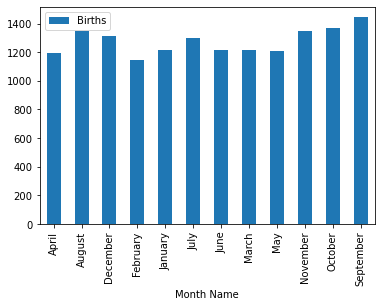

In [21]:
# Use Pivot table to get female births in each month
pd.pivot_table(female,values=['Births'],index=['Month Name'],aggfunc=np.sum) # Month Name data is not in proper order.
pd.pivot_table(female,values=['Births'],index=['Month Name'],aggfunc=np.sum).plot.bar()

In [22]:
# We will convert "Month Name" column into Categorical variable and specify the ordering
order = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']
 
female['Month Name']=pd.Categorical(female['Month Name'],order)

In [23]:
female.groupby('Month Name').sum()[['Births']] # Now the output is much better after custom ordering

,Births
Month Name,
January,1213
February,1148
March,1218
April,1195
May,1208
June,1212
July,1300
August,1351
September,1446


<Figure size 1008x432 with 0 Axes>

<BarContainer object of 12 artists>

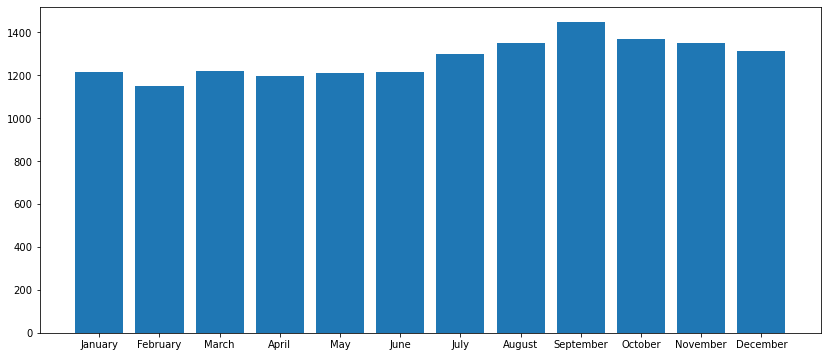

In [24]:
# Bar plot to get monthly female births using matplotlib library
plt.figure(figsize=(14,6))
plt.bar(female.groupby('Month Name').sum().index,female.groupby('Month Name').sum()['Births'])
plt.show()

<AxesSubplot:xlabel='Month Name'>

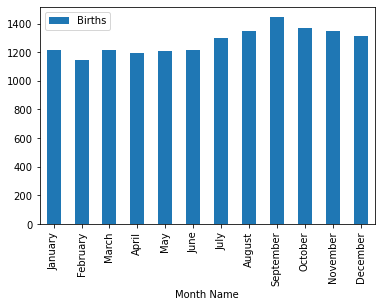

In [25]:
# Bar plot to get monthly female births using Pandas
pd.pivot_table(female,values=['Births'],index=['Month Name'],aggfunc=np.sum).plot.bar()

In [26]:
# Same way we can implement custom ordering for Day Name field
order=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
female['Day Name']=pd.Categorical(female['Day Name'],order)
female.groupby('Day Name').sum()[['Births']] 

,Births
Day Name,
Monday,2139
Tuesday,2275
Wednesday,2280
Thursday,2283
Friday,2182
Saturday,2142
Sunday,2022


<Figure size 1008x432 with 0 Axes>

<BarContainer object of 7 artists>

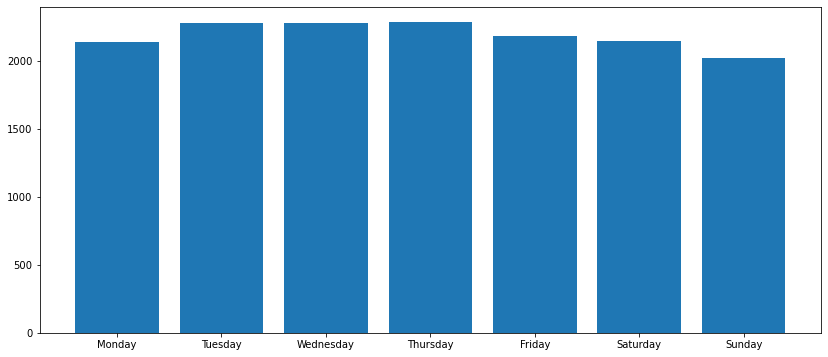

In [27]:
# Plot Bar Graph to show female births on day basis.
plt.figure(figsize=(14,6))
plt.bar(female.groupby('Day Name').sum().index,female.groupby('Day Name').sum()['Births'])
plt.show()

<Figure size 1080x360 with 0 Axes>

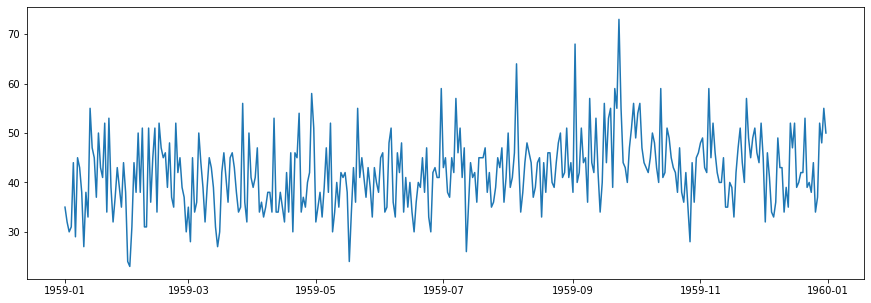

In [28]:
# Daily female births
plt.figure(figsize=(15,5))
plt.plot(female['Date'],female['Births'])

In [29]:
# Get all records for the month of Janaury(1959-01-01 - 1959-01-31). 
# Using boolean is not good method when we are dealing with large datasets.
female[(pd.to_datetime(female['Date']) > pd.Timestamp(date(1959,1,1))) & 
       (pd.to_datetime(female['Date']) < pd.Timestamp(date(1959,1,31)))]

,Date,Births,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
1,1959-01-02,32,1,2,1959,1,4,Friday,January
2,1959-01-03,30,1,3,1959,1,5,Saturday,January
3,1959-01-04,31,1,4,1959,1,6,Sunday,January
4,1959-01-05,44,1,5,1959,2,0,Monday,January
5,1959-01-06,29,1,6,1959,2,1,Tuesday,January
6,1959-01-07,45,1,7,1959,2,2,Wednesday,January
7,1959-01-08,43,1,8,1959,2,3,Thursday,January
8,1959-01-09,38,1,9,1959,2,4,Friday,January
9,1959-01-10,27,1,10,1959,2,5,Saturday,January
10,1959-01-11,38,1,11,1959,2,6,Sunday,January


In [30]:
# Convert date column into Datetime index for faster selection.
female = female.set_index(['Date'])
female
female.index # DatetimeIndex

,Births,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
Date,,,,,,,,
1959-01-01,35,1,1,1959,1,3,Thursday,January
1959-01-02,32,1,2,1959,1,4,Friday,January
1959-01-03,30,1,3,1959,1,5,Saturday,January
1959-01-04,31,1,4,1959,1,6,Sunday,January
1959-01-05,44,1,5,1959,2,0,Monday,January
...,...,...,...,...,...,...,...,...
1959-12-27,37,12,27,1959,52,6,Sunday,December
1959-12-28,52,12,28,1959,53,0,Monday,December
1959-12-29,48,12,29,1959,53,1,Tuesday,December


DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [31]:
# Now lets select the data
female.loc['1959'] # Get all data for year 1959

,Births,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
Date,,,,,,,,
1959-01-01,35,1,1,1959,1,3,Thursday,January
1959-01-02,32,1,2,1959,1,4,Friday,January
1959-01-03,30,1,3,1959,1,5,Saturday,January
1959-01-04,31,1,4,1959,1,6,Sunday,January
1959-01-05,44,1,5,1959,2,0,Monday,January
...,...,...,...,...,...,...,...,...
1959-12-27,37,12,27,1959,52,6,Sunday,December
1959-12-28,52,12,28,1959,53,0,Monday,December
1959-12-29,48,12,29,1959,53,1,Tuesday,December


In [32]:
female.loc['1960'] # There is no data for 1960. 

KeyError: '1960'

In [33]:
# Get all rows for the month of Janaury(1959-01-01 - 1959-01-31).
female.loc['1959-01-01':'1959-01-31'][['Births']]

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


In [34]:
# Total births in the month of January 
female.loc['1959-01-01':'1959-01-31'][['Births']].sum()

Births    1213
dtype: int64

<AxesSubplot:xlabel='Date'>

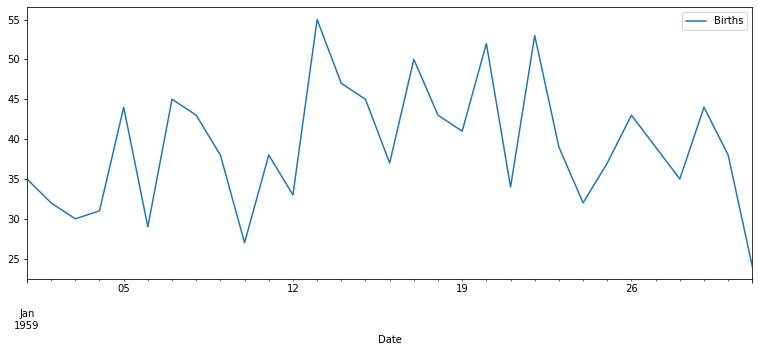

In [35]:
# plot line chart for January data using Pandas visualization
female.loc['1959-01-01':'1959-01-31'][['Births']].plot(figsize=(13,5))

<Figure size 936x360 with 0 Axes>

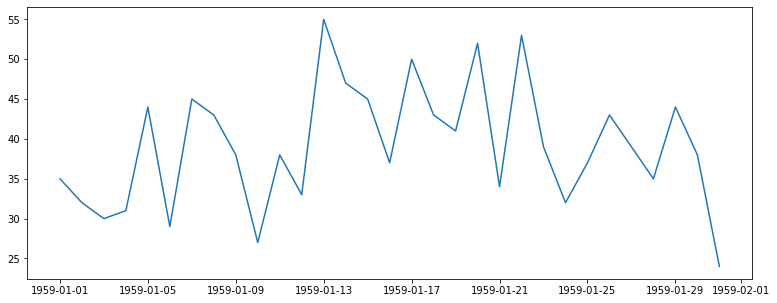

In [36]:
# plot line chart for January data using Matplotlib library
plt.figure(figsize=(13,5))
plt.plot(female.loc['1959-01-01':'1959-01-31'][['Births']])

,SampleData
Date,
1920-01-31,11
1920-02-29,62
1920-03-31,192
1920-04-30,152
1920-05-31,146
...,...
2019-08-31,198
2019-09-30,83
2019-10-31,29


<AxesSubplot:xlabel='Date'>

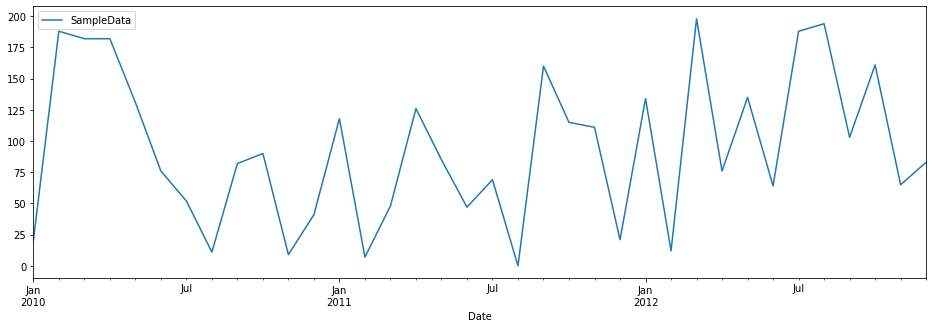

In [37]:
#Generate Test Dataset using date_range() and random.randint()
df = pd.DataFrame({'Date':pd.date_range('1/19/1920', periods = 1200, freq ='M') ,'SampleData':np.random.randint(0,200,size=1200)})
df=df.set_index(['Date']) # Set Date column as index
df
df.loc['2010':'2012'].plot(figsize=(16,5)) # Plot line chart for data between 2010-2012

# End